In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Importing data
df_flights = pd.read_csv("flights2022.csv")
df_flights.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [ ]:
#Checking data size and missing values.
print(df_flights.shape)

# Checking for the number of NaN values in each column
nan_count = df_flights.isna().sum()

# Display the result
print(nan_count)

(111376, 20)
year                 0
month                0
day                  0
dep_time          2445
sched_dep_time       0
dep_delay         2445
arr_time          2542
sched_arr_time       0
arr_delay         2679
carrier              0
flight               0
tailnum            129
origin               0
dest                 0
air_time          2679
distance             0
hour                 0
minute               0
time_hour            0
airline              0
dtype: int64


In [ ]:
#Missing values could be due to cancellations, because of this they will not be removed.

In [ ]:
#Since we want to look into the factors influencing the depature delays and cancellations we first specify the data into routes.
df_flights["route"] = df_flights["origin"] + "-" + df_flights["dest"]
df_flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,route
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,SEA-IAH
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,SEA-FAI
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ATL
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ORD
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,PDX-ORD


In [ ]:
# Group the flights by unique routes and calculate statistics
routes_delays_cancels = df_flights.groupby("route").agg(
    # Calculate mean departure delay for each route
    mean_dep_delay=("dep_delay", "mean"),
    # Count total cancellations (missing departure times) for each route
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()

In [ ]:
print(routes_delays_cancels)

       route  mean_dep_delay  total_cancellations
0    PDX-ABQ        1.098039                    2
1    PDX-ANC        4.748936                    4
2    PDX-ATL        7.020979                   13
3    PDX-AUS        5.435374                    5
4    PDX-BOI        5.136430                    7
..       ...             ...                  ...
144  SEA-STS        6.782493                    5
145  SEA-SUN        5.735537                    5
146  SEA-TPA        6.537344                   20
147  SEA-TUS        6.161290                   13
148  SEA-YKM        5.427350                   11

[149 rows x 3 columns]


In [ ]:
# Identifying routes with the highest mean departure delays
top_routes_by_delay = routes_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(10)
print(top_routes_by_delay)

       route  mean_dep_delay  total_cancellations
13   PDX-DSM       35.782609                    0
19   PDX-GRR       35.739130                    2
17   PDX-FLL       30.893617                    3
109  SEA-MIA       29.916667                    4
71   SEA-CLT       27.313199                   14
52   PDX-STL       27.000000                    0
5    PDX-BOS       24.812500                    4
12   PDX-DFW       24.735941                   23
9    PDX-DAL       24.100000                    0
24   PDX-JFK       21.729433                   22


In [ ]:
#Identifying routes with highest number of cancellations
top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False).head(10)
print(top_routes_by_cancellations)

       route  mean_dep_delay  total_cancellations
103  SEA-LAX        7.195969                   93
58   SEA-ANC        9.316991                   78
137  SEA-SFO        7.054403                   73
102  SEA-LAS        8.943503                   73
121  SEA-PDX        7.730982                   71
98   SEA-JFK       17.305890                   70
46   PDX-SEA        4.684694                   68
76   SEA-DEN        8.302342                   66
120  SEA-ORD       10.397800                   63
123  SEA-PHX        7.645497                   60


<ipython-input-12-201c0f7b3616>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)


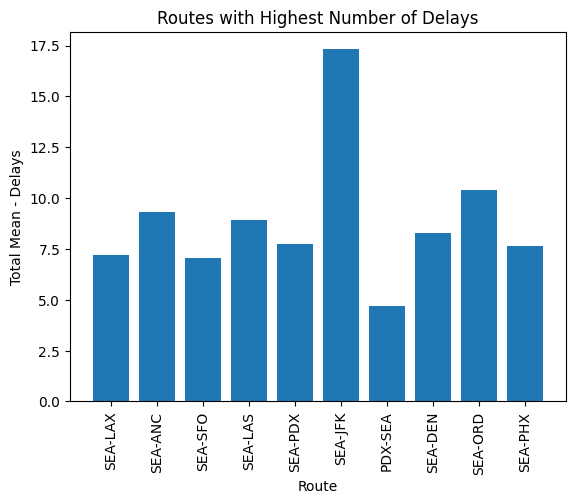

In [ ]:
# Bar graph with highest number of delays
top10_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["mean_dep_delay"])
ax.set_xlabel("Route")
ax.set_ylabel("Total Mean - Delays")
ax.set_title("Routes with Highest Number of Delays")
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.show()
plt.close()

<ipython-input-13-0771728cd315>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)


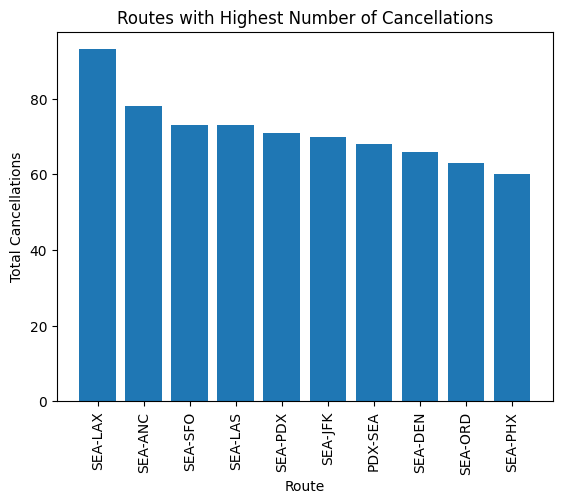

In [ ]:
# Bar graph with highest number of cancellations
top10_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["total_cancellations"])
ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Routes with Highest Number of Cancellations")
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.show()
plt.close()

In [ ]:
# Instead of looking at flights routes, now we will look at the airlines itself
#Find mean departure delays and total cancellations by airline
airlines_delays_cancels = df_flights.groupby("airline").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()
print(airlines_delays_cancels)

                   airline  mean_dep_delay  total_cancellations
0     Alaska Airlines Inc.        6.739282                 1300
1            Allegiant Air       26.608696                    6
2   American Airlines Inc.       20.129903                   85
3     Delta Air Lines Inc.       10.648634                  383
4   Frontier Airlines Inc.       14.355856                   12
5   Hawaiian Airlines Inc.        8.186207                    4
6              Horizon Air        6.270965                  238
7          JetBlue Airways       42.141524                   33
8    SkyWest Airlines Inc.        4.596561                  165
9   Southwest Airlines Co.       11.407163                  100
10        Spirit Air Lines       11.095758                   39
11   United Air Lines Inc.        7.072115                   80


In [ ]:
# Identify airlines with the highest mean departure delay
top_airlines_by_delay = airlines_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(10)
print(top_airlines_by_delay)

                   airline  mean_dep_delay  total_cancellations
7          JetBlue Airways       42.141524                   33
1            Allegiant Air       26.608696                    6
2   American Airlines Inc.       20.129903                   85
4   Frontier Airlines Inc.       14.355856                   12
9   Southwest Airlines Co.       11.407163                  100
10        Spirit Air Lines       11.095758                   39
3     Delta Air Lines Inc.       10.648634                  383
5   Hawaiian Airlines Inc.        8.186207                    4
11   United Air Lines Inc.        7.072115                   80
0     Alaska Airlines Inc.        6.739282                 1300


In [ ]:
#Identify airlines with highest number of cancellations
top_airlines_by_cancellations = airlines_delays_cancels.sort_values("total_cancellations", ascending=False).head(10)
print(top_airlines_by_cancellations)

                   airline  mean_dep_delay  total_cancellations
0     Alaska Airlines Inc.        6.739282                 1300
3     Delta Air Lines Inc.       10.648634                  383
6              Horizon Air        6.270965                  238
8    SkyWest Airlines Inc.        4.596561                  165
9   Southwest Airlines Co.       11.407163                  100
2   American Airlines Inc.       20.129903                   85
11   United Air Lines Inc.        7.072115                   80
10        Spirit Air Lines       11.095758                   39
7          JetBlue Airways       42.141524                   33
4   Frontier Airlines Inc.       14.355856                   12


<ipython-input-17-7a39630c4924>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)


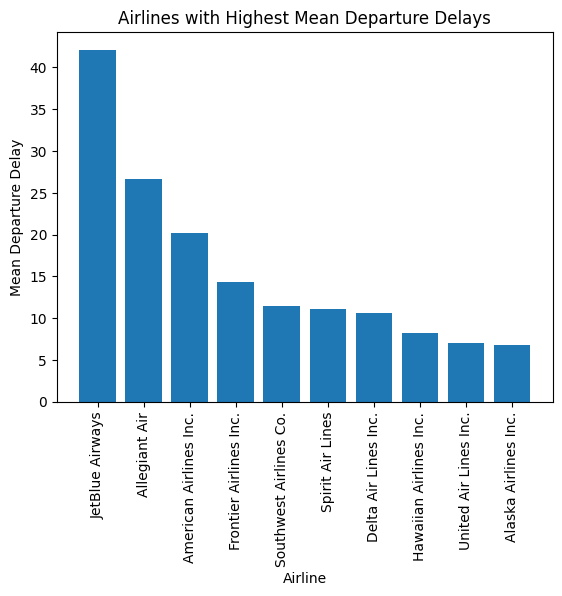

In [ ]:
# Create a bar graph for highest mean depearture delay
top10_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["mean_dep_delay"])
ax.set_xlabel("Airline")
ax.set_ylabel("Mean Departure Delay")
ax.set_title("Airlines with Highest Mean Departure Delays")
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()

<ipython-input-18-80ad6050c54f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)


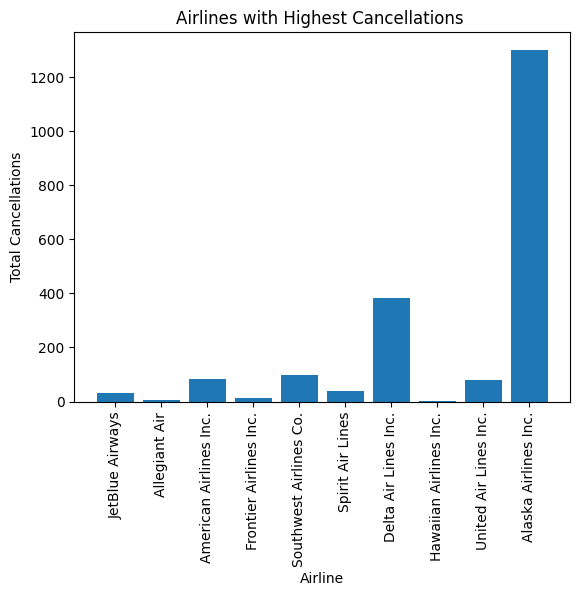

In [ ]:
# Create a bar graph for highest mean depearture delay
top10_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["total_cancellations"])
ax.set_xlabel("Airline")
ax.set_ylabel("Total Cancellations")
ax.set_title("Airlines with Highest Cancellations ")
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()